In [61]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

df = pd.read_csv(r'/Users/babyshuang/Desktop/Porfolio#2_1.27/movies.csv')

In [7]:
#Let's look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [10]:
#Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
#Data types of for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [63]:
#change data type of columns
df = df.dropna(subset=['budget','gross']).copy()
df[['budget','gross']] = df[['budget','gross']].astype('int64')

In [77]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime released_clean  year_correct  
5445  2847246203  Twentieth Century Fox    162.0     2009-12-18        2009.0  
7445  2797501328         Marvel Studios    181.0     2019-04-26        2019.0  
3045  2201647264  Twentieth Century Fox    194.0     1997-12-19        1997.0  
6663  2069521700              Lucasfilm    138.0     2015-12-18        2015.0  
7244  2048359754         Marvel Studios    149.0     2018-04-27        2018.0

In [64]:
#creat correct year column
df['released_clean'] = df['released'].str.replace(r"\s*\(.*\)", "", regex=True)
df['released_clean'] = pd.to_datetime(df['released_clean'], errors='coerce')
df['year_correct'] = df['released_clean'].dt.year

In [76]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime released_clean  year_correct  
5445  2847246203  Twentieth Century Fox    162.0     2009-12-18        2009.0  
7445  2797501328         Marvel Studios    181.0     2019-04-26        2019.0  
3045  2201647264  Twentieth Century Fox    194.0     1997-12-19        1997.0  
6663  2069521700              Lucasfilm    138.0     2015-12-18        2015.0  
7244  2048359754         Marvel Studios    149.0     2018-04-27        2018.0

In [65]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [36]:
pd.set_option('display.max_rows',None)

In [78]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

In [79]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime released_clean  year_correct  
5445  2847246203  Twentieth Century Fox    162.0     2009-12-18        2009.0  
7445  2797501328         Marvel Studios    181.0     2019-04-26        2019.0  
3045  2201647264  Twentieth Century Fox    194.0     1997-12-19        1997.0  
6663  2069521700              Lucasfilm    138.0     2015-12-18        2015.0  
7244  2048359754         Marvel Studios    149.0     2018-04-27        2018.0

In [ ]:
# Budget high correlation
# company high correlation





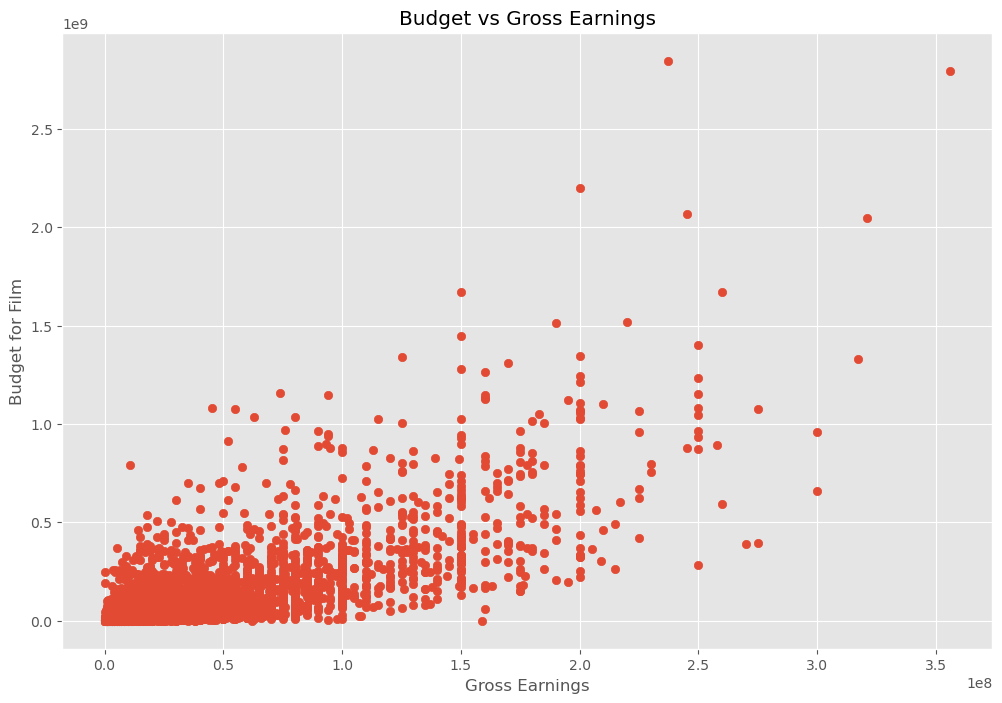

In [45]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [44]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year correct released_clean  \
5445  2847246203  Twentieth Century Fox    162.0         2009     2009-12-18   
7445  2797501328         Marvel Studios    181.0         2019     2019-04-26   
3045  2201647264  Twentieth Century Fox    194.0         1997     1997-12-19   
6663  2069521700              Lucasfilm    138.0         2015     2015-12-18   
7244  2048359754         Marvel Studios    149.0         2018     2018-04-27   

      year_correct  
5445        2009.0  
7445        2019.0  
3045        1997.0  
6663        2015.0  
7244        2018.0

<Axes: xlabel='budget', ylabel='gross'>

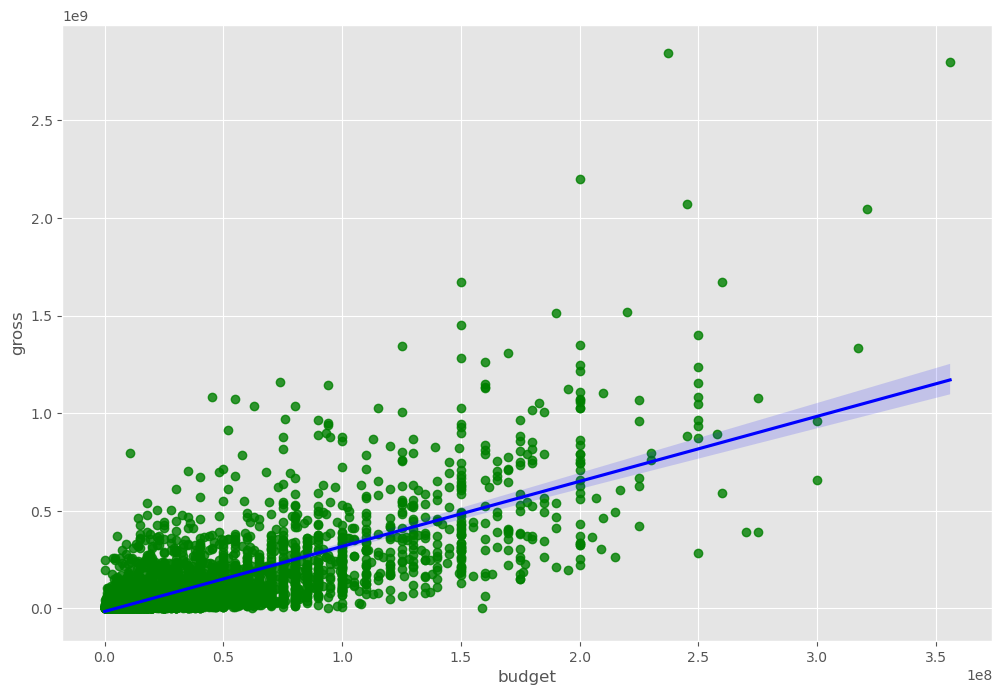

In [49]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"green"},line_kws={"color":"blue"})



In [ ]:
# Let's start looking at correlation


In [52]:
df.corr(numeric_only=True, method='pearson') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime  \
year          1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score         0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes         0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget        0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross         0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime       0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
year_correct  0.998876  0.060547  0.202004  0.319605  0.268049  0.074320   

              year_correct  
year              0.998876  
score             0.060547  
votes             0.202004  
budget            0.319605  
gross             0.268049  
runtime           0.074320  
year_correct      1.000000

In [ ]:
# High correlation between budget and gross

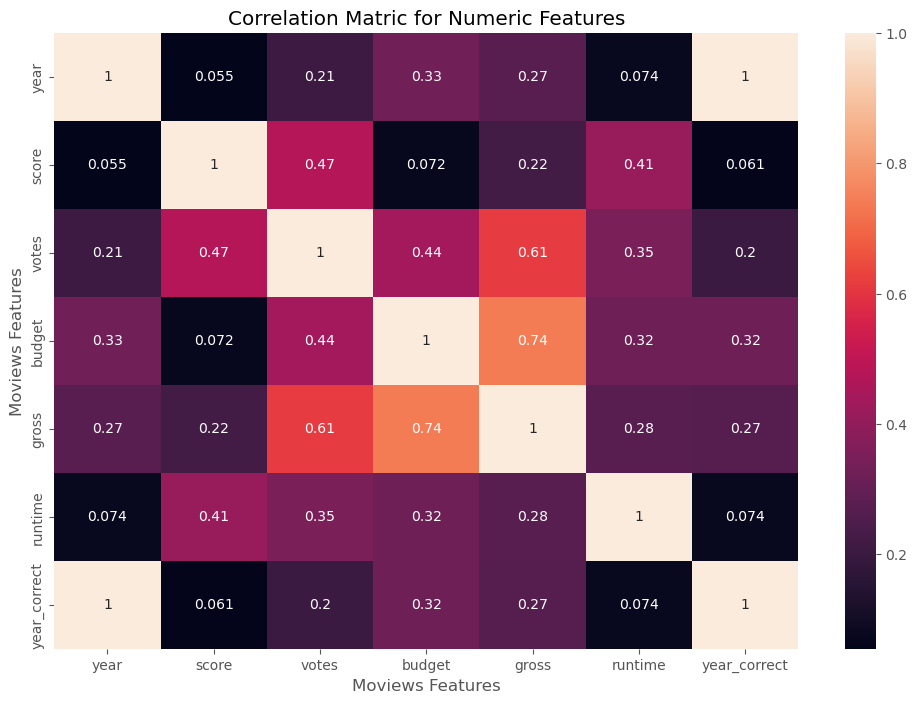

In [54]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Moviews Features')
plt.ylabel('Moviews Features')
plt.show()

In [55]:
# Look at Company

df.head()


name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year correct released_clean  \
5445  2847246203  Twentieth Century Fox    162.0         2009     2009-12-18   
7445  2797501328         Marvel Studios    181.0         2019     2019-04-26   
3045  2201647264  Twentieth Century Fox    194.0         1997     1997-12-19   
6663  2069521700              Lucasfilm    138.0         2015     2015-12-18   
7244  2048359754         Marvel Studios    149.0         2018     2018-04-27   

      year_correct  
5445        2009.0  
7445        2019.0  
3045        1997.0  
6663        2015.0  
7244        2018.0

In [57]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized
        



name  rating  genre  year  released  score      votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000.0       787    1265   
7445   389       5      0  2019       138    8.4   903000.0       106     515   
3045  4923       5      6  1997       535    7.8  1100000.0       787    1265   
6663  3656       5      0  2015       530    7.8   876000.0       770    1810   
7244   390       5      0  2018       146    8.4   897000.0       106     515   
7480  4402       4      2  2019      1130    6.9   222000.0      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000.0       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000.0      1062    1650   
6646  1545       5      0  2015       166    7.1   370000.0       811     483   
7494  1534       4      2  2019      2059    6.8   148000.0       279    1386   
6644   388       5      0  2015      1717    7.3   777000.0      1062    1650   
7247   568       5      0  2018       725    7.3   661000.0      1721    2694   
5845  1736       5      1  2011      1096    8.1   790000.0       454    2871   
7075  3657       5      0  2017       501    7.0   581000.0      1592    2494   
7271  2126       5      0  2018      1388    6.2   277000.0       766     779   
6262  1533       4      2  2013      2088    7.4   585000.0       279    1386   
7072   478       4      7  2017      1566    7.1   283000.0       156    2831   
7281  1973       4      2  2018      1329    7.6   263000.0       194     328   
7055  4133       5      0  2017        45    6.6   214000.0       569    1015   
6244  2021       5      0  2013      1886    7.1   779000.0      1772     839   
6688  2554       4      2  2015      1054    6.4   218000.0      1146     363   
6846   752       5      0  2016      1916    7.8   694000.0       106     515   
7250   344       5      0  2018       566    6.9   404000.0       811     701   
4245  4421       5      0  2003       517    8.9  1700000.0      1523    1240   
7458  3608       5      0  2019      1140    7.5   359000.0      1021     481   
7456   757       5      0  2019      1702    6.8   478000.0        97     182   
5878  4964       5      0  2011      1446    6.2   390000.0      1305     888   
6059  3511       5      0  2012      2154    7.7   642000.0      1737    2227   
6494  4963       5      0  2014      1428    5.6   302000.0      1305     888   
2448  4402       1      2  1994      1398    8.5   970000.0      1690    1208   
6047  4062       5      0  2012      1148    8.4  1600000.0       319    1610   
7463  3653       5      0  2019       554    6.5   394000.0       770     491   
7450  2099       6      5  2019      2327    8.4  1000000.0      1943    3008   
7488  4950       1      2  2019      1376    7.7   217000.0      1054    1528   
5685  4949       1      2  2010      1349    8.2   776000.0      1164    1528   
4852  2997       5      0  2006      1259    7.3   668000.0       676    2937   
6869  3273       5      0  2016       510    7.8   572000.0       617     494   
7481   207       4      1  2019      1842    6.9   239000.0       707    1471   
5860  3000       5      0  2011      1808    6.6   492000.0      1640    2937   
7140  1105       4      2  2017      1468    6.3   119000.0      1146     526   
2245  2123       5      0  1993      1296    8.1   894000.0      1864    2075   
6908  1415       4      2  2016      1343    7.3   250000.0        82     153   
3451  3650       4      0  1999      1783    6.5   748000.0       655    1048   
5667   216       4      1  2010      1684    6.4   392000.0      1924    1853   
6863  5344       4      2  2016      1678    8.0   450000.0       241     391   
6045  4254       5      1  2012       493    7.8   773000.0      1523     969   
3843  1741       4      1  2001      1993    7.6   685000.0       282    1238   
5243  4061       5      0  2008      1120    9.0  2400000.0       319    1610   
6311  1104       4      2  2013      

In [75]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime released_clean  year_correct  
5445  2847246203  Twentieth Century Fox    162.0     2009-12-18        2009.0  
7445  2797501328         Marvel Studios    181.0     2019-04-26        2019.0  
3045  2201647264  Twentieth Century Fox    194.0     1997-12-19        1997.0  
6663  2069521700              Lucasfilm    138.0     2015-12-18        2015.0  
7244  2048359754         Marvel Studios    149.0     2018-04-27        2018.0

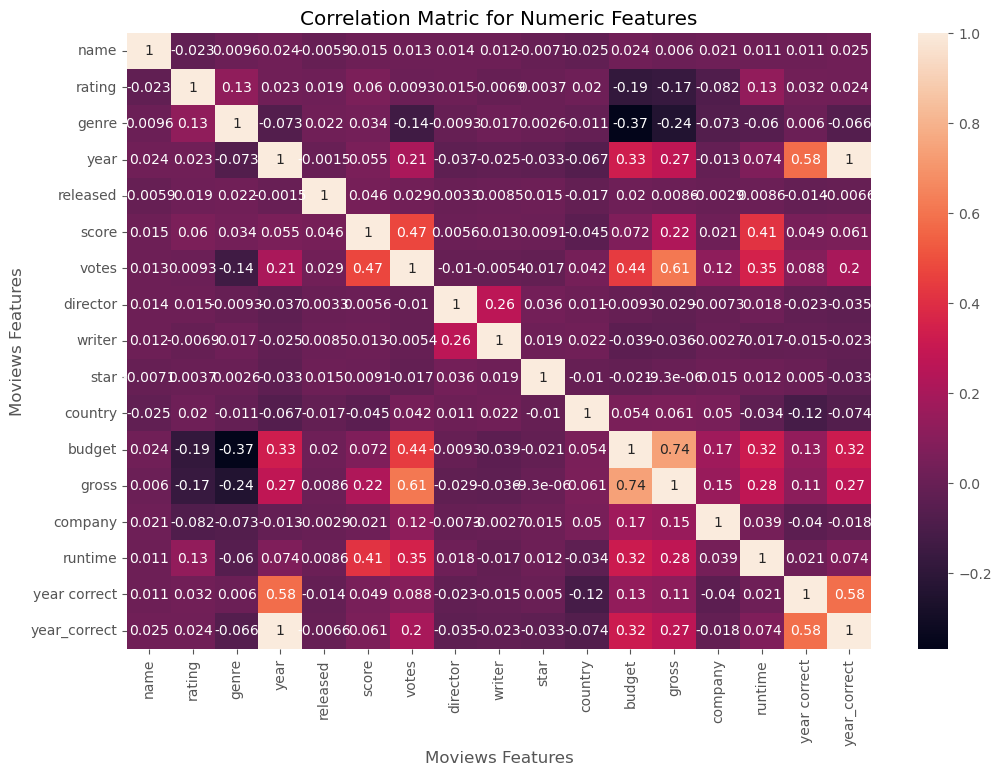

In [69]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Moviews Features')
plt.ylabel('Moviews Features')
plt.show()

In [70]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name            1.000000 -0.023013  0.009617  0.024435 -0.005896  0.014955   
rating         -0.023013  1.000000  0.128102  0.022668  0.018836  0.059550   
genre           0.009617  0.128102  1.000000 -0.073026  0.021712  0.034061   
year            0.024435  0.022668 -0.073026  1.000000 -0.001481  0.055174   
released       -0.005896  0.018836  0.021712 -0.001481  1.000000  0.046424   
score           0.014955  0.059550  0.034061  0.055174  0.046424  1.000000   
votes           0.012915  0.009255 -0.136457  0.205758  0.029029  0.473809   
director        0.013699  0.014847 -0.009303 -0.036936  0.003341  0.005573   
writer          0.011602 -0.006923  0.017500 -0.024568  0.008514  0.012860   
star           -0.007109  0.003737  0.002619 -0.032770  0.015363  0.009121   
country        -0.024555  0.020148 -0.010847 -0.066662 -0.017231 -0.044690   
budget          0.023698 -0.186892 -0.368900  0.327781  0.019888  0.071792   
gross           0.005966 -0.168814 -0.244380  0.274264  0.008614  0.222143   
company         0.021209 -0.082189 -0.073293 -0.013062 -0.002927  0.021054   
runtime         0.010800  0.133239 -0.060186  0.074203  0.008619  0.414580   
year correct    0.011351  0.031911  0.005960  0.580521 -0.013652  0.048513   
released_clean  0.024755 -0.005796 -0.075238  0.581604  0.015023  0.046023   
year_correct    0.024677  0.023737 -0.065767  0.998876 -0.006645  0.060547   

                   votes  director    writer      star   country    budget  \
name            0.012915  0.013699  0.011602 -0.007109 -0.024555  0.023698   
rating          0.009255  0.014847 -0.006923  0.003737  0.020148 -0.186892   
genre          -0.136457 -0.009303  0.017500  0.002619 -0.010847 -0.368900   
year            0.205758 -0.036936 -0.024568 -0.032770 -0.066662  0.327781   
released        0.029029  0.003341  0.008514  0.015363 -0.017231  0.019888   
score           0.473809  0.005573  0.012860  0.009121 -0.044690  0.071792   
votes           1.000000 -0.010198 -0.005394 -0.017140  0.042146  0.440021   
director       -0.010198  1.000000  0.262940  0.036289  0.011108 -0.009340   
writer         -0.005394  0.262940  1.000000  0.019273  0.022153 -0.039420   
star           -0.017140  0.036289  0.019273  1.000000 -0.010135 -0.021282   
country         0.042146  0.011108  0.022153 -0.010135  1.000000  0.054372   
budget          0.440021 -0.009340 -0.039420 -0.021282  0.054372  1.000000   
gross           0.614904 -0.029366 -0.035999 -0.000009  0.060929  0.740395   
company         0.119366 -0.007337 -0.002658  0.015086  0.049559  0.171385   
runtime         0.352437  0.018082 -0.016672  0.012439 -0.033554  0.318595   
year correct    0.088298 -0.022716 -0.014895  0.004977 -0.115285  0.128790   
released_clean  0.134804 -0.016900 -0.010217 -0.003299 -0.031406  0.204611   
year_correct    0.202004 -0.035210 -0.022987 -0.033427 -0.074205  0.319605   

                   gross   company   runtime  year correct  released_clean  \
name            0.005966  0.021209  0.010800      0.011351        0.024755   
rating         -0.168814 -0.082189  0.133239      0.031911       -0.005796   
genre          -0.244380 -0.073293 -0.060186      0.005960       -0.075238   
year            0.274264 -0.013062  0.074203      0.580521        0.581604   
released        0.008614 -0.002927  0.008619     -0.013652        0.015023   
score           0.222143  0.021054  0.414580      0.048513        0.046023   
votes           0.614904  0.119366  0.352437      0.088298        0.134804   
director       -0.029366 -0.007337  0.018082     -0.022716       -0.016900   
writer         -0.035999 -0.002658 -0.016672     -0.014895       -0.010217   
star           -0.000009  0.015086  0.012439      0.004977       -0.003299   
country         0.060929  0.049559 -0.033554     -0.115285       -0.031406   
budget          0.740395  0.171385  0.318595      0.128790        0.204611   
gross           1.000000  0.150233  0.27

In [71]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name            name              1.000000
                rating           -0.023013
                genre             0.009617
                year              0.024435
                released         -0.005896
                score             0.014955
                votes             0.012915
                director          0.013699
                writer            0.011602
                star             -0.007109
                country          -0.024555
                budget            0.023698
                gross             0.005966
                company           0.021209
                runtime           0.010800
                year correct      0.011351
                released_clean    0.024755
                year_correct      0.024677
rating          name             -0.023013
                rating            1.000000
                genre             0.128102
                year              0.022668
                released          0.018836
           

In [72]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.368900
budget          genre            -0.368900
genre           gross            -0.244380
gross           genre            -0.244380
budget          rating           -0.186892
rating          budget           -0.186892
gross           rating           -0.168814
rating          gross            -0.168814
genre           votes            -0.136457
votes           genre            -0.136457
year correct    country          -0.115285
country         year correct     -0.115285
company         rating           -0.082189
rating          company          -0.082189
released_clean  genre            -0.075238
genre           released_clean   -0.075238
year_correct    country          -0.074205
country         year_correct     -0.074205
company         genre            -0.073293
genre           company          -0.073293
                year             -0.073026
year            genre            -0.073026
country         year             -0.066662
year       

In [74]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

year            year correct      0.580521
year correct    year              0.580521
year            released_clean    0.581604
released_clean  year              0.581604
year_correct    year correct      0.584806
year correct    year_correct      0.584806
gross           votes             0.614904
votes           gross             0.614904
gross           budget            0.740395
budget          gross             0.740395
year_correct    year              0.998876
year            year_correct      0.998876
year_correct    released_clean    0.999623
released_clean  year_correct      0.999623
name            name              1.000000
year correct    year correct      1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
released        released          1.000000
score           score             1.000000
votes           votes             1.000000
released_clean  released_clean    1.000000
director   

In [ ]:
# Votes and budget have the highest correlation to gross earnings

#Company has low correlation
